In [23]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd
import math

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

## Ejemplo 2 - Sistemas de segundo orden

Se realizó el montaje de la simulación de un filtro de segundo orden y se capturaron los datos de salida. Se debe realizar el proceso de identificación y obtención de la función de transferencia a partir del método de análisis de la curva de reacción.

,t1,u,s,t2,y
0,0.000000,0.0,NaN,0.000000,0.000000e+00
1,0.000006,0.0,NaN,0.000006,7.076322e-12
2,0.000012,0.0,NaN,0.000012,1.233710e-10
3,0.000024,0.0,NaN,0.000024,-5.930950e-10
4,0.000048,0.0,NaN,0.000048,7.594588e-10
...,...,...,...,...,...
79,0.028111,0.1,NaN,0.028111,1.999349e-01
80,0.028711,0.1,NaN,0.028711,1.998821e-01
81,0.029311,0.1,NaN,0.029311,1.998517e-01
82,0.029911,0.1,NaN,0.029911,1.998403e-01


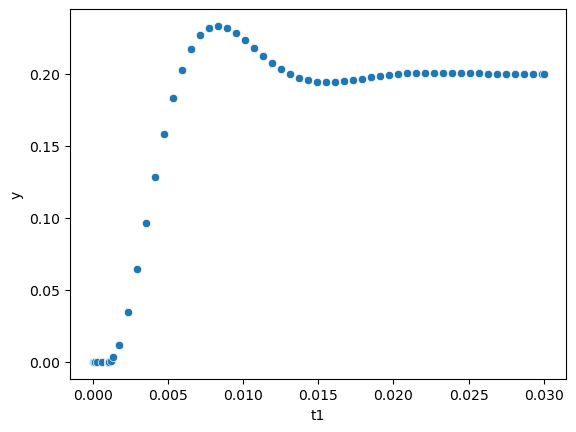

In [26]:
## Respuesta típica de un sistema de segundo orden con ruido

datos = pd.read_csv('data\low2.csv')
sns.scatterplot(datos,x ='t1',y = 'y' )


TransferFunction(array([512]), array([ 1. ,  9.6, 64. ]))

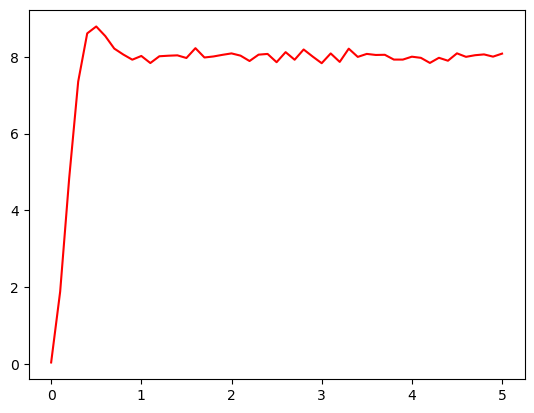

In [2]:

tf = 5
dt = 0.1
t = np.linspace(0,tf,int(tf/dt)+1)

g = control.tf([K*wn*wn],[1,2*z*wn,wn*wn])
_,y = control.step_response(g,t)
N = len(t)
## Ruido para simular la señal de salida capturada "yn"
r = 0.1
e = np.random.normal(0,r,size=N)
yn = y+e
plt.plot(t,yn,color = 'red')

g

## Experimento de identificación

**Paso 1:** Determinar el porcentaje de sobrepaso para para calcular el índice de amortiguamiento del sistema. En este caso se debe "observar" el valor final de establecimiento del sistema.

In [3]:
## El porcentaje de sobrepaso (overshot) y el tiempo del pico

## Valor observado de la gráfica de la respuesta.
Kf = 8
############

###### Valor máximo alcanzado por la respuesta y Valor del sobrepaso
Kmax = np.max(yn)
os = ((Kmax - Kf)/Kf)
############

## Calculando el tiempo de pico
for i in range(len(yn)):
    if(yn[i]==Kmax):
        tp = t[i]
        break
os, tp

**Paso 2:** Calcular el valor aproximado de zeta ($\zeta$) para el sistema.

In [4]:
## Determinando el índice de amortiguamiento
pi = math.pi
ze = -math.log(os)/math.sqrt(pi*pi+math.log(os)*math.log(os))
ze

**Paso 3:** Calculando la frecuencia natural del sistema

In [5]:
## Determinando el valor de wn a partir del tp y de zeta
we = pi/(tp*math.sqrt(1-ze*ze))
we

In [6]:
## Calculando el tiempo de establecimiento y 
## determinando el valor aproximado del valor final
ts = 4/(ze*we)
ts

## Calculando el valor final utilizando el tiempo de establecimiento
Kf = 0
i1 = 0;
i2 = 0;
for j in range(N-i):
    if(t[j]>ts):
        i1 = j+i
        Kf = Kf+yn[i1]
        i2 = i2+1

Kf = Kf/i2
print(Kf)

8.013718056243947


**Paso 4:** Armando la función de transferencia de segundo orden.

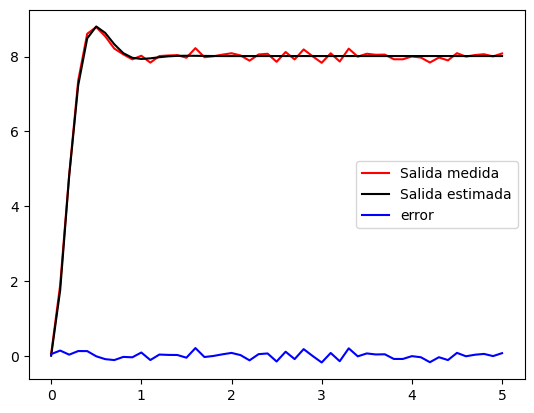

In [7]:
## Armando la función de transferencia aproximada:
ge = control.tf([Kf*we*we],[1,2*ze*we,we*we])
_,ye = control.step_response(ge,t)
e = yn - ye
plt.plot(t,yn,color = 'red')
plt.plot(t,ye,color = 'black')
plt.plot(t,e,color = 'blue')
plt.legend(['Salida medida','Salida estimada','error'])


In [11]:
## Función de transferencia estimada o identificada

ge

TransferFunction(array([488.32073187]), array([ 1.        ,  9.26437999, 60.93560173]))

In [10]:
## Función de transferencia original

g

TransferFunction(array([512]), array([ 1. ,  9.6, 64. ]))